# Black Friday Sales Analysis and Prediction_SOAI

## 🏨 Background

Black Friday signifies the initiation of an extensive shopping festival in the United States, during which prominent retail giants like Amazon and Flipkart entice customers with enticing discounts and deals across diverse product categories, including electronics, clothing, kitchen appliances, and décor.Originating in the USA and also referred to as Thanksgiving Day, is celebrated annually on the fourth Thursday of November, emerging as the busiest shopping day. The sale is organized with the aim of encouraging customers to make more online purchases, thereby boosting the online shopping sector.

![black-friday-2023.jpg](black-friday-2023.jpg)

The shopping sector has undergone significant transformation due to the Internet revolution, with a growing preference for online shopping over traditional methods, driven by advantages such as convenience, better prices, a wider variety, easy price comparisons, and the absence of crowds.Various researchers have conducted studies to predict sales, with the analysis of this data forming the foundation for offering discounts on a range of products

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summaries of various customers for selected high-volume products from last month.

The data set also contains customer demographics (age, gender, marital status, city type, stay in the current city), product details (productid and product category) and Total purchase amount from last month.

Our goal is to predict the customer behaviour (purchase amount) of customers against various products, using different machine learning techniques passing by exploratory data analysis of the dataset, which will help them to create a personalized offer for customers against different products.

**The project will be splited into two parts:**
- the exploratory data analysis of the dataset (DataScience part)
- predicting the customer purshase amount (machine learning part)

### 💾 The Data

This study utilizes the publicly available Black Friday Sales Dataset from Kaggle, comprising sales transaction data with a total of 550,069 rows. The dataset encompasses various attributes, including user_id, product_id, marital_status, city_category, occupation, etc., as outlined in Table 1. Employing the Black Friday Sales dataset, we train diverse machine learning models and predict customers' purchase amounts during Black Friday sales. The resulting purchase predictions offer valuable insights to retailers, enabling them to analyze and tailor offers to cater to customers' preferred products more effectively.

| Column     | Description              |Masked|
|------------|--------------------------|------|
| `USER_ID` | UNIQUE ID OF CUSTOMER|FALSE|
| `PRODUCT_ID` | UNIQUE PRODUCT ID |FALSE|
| `GENDER` |SEX OF CUSTOMER |FALSE|
| `AGE` |CUSTOMER AGE |FALSE|
| `OCCUPATION` | OCCUPATION OF CUSTOMER |TRUE|
| `CITY_CATEGORY` | CITY CATEGORY OF CUSTOMER |TRUE|
| ` STAY_IN_CURRENT_CITY` | NUMBER OF YEARS CUSTOMER STAYS IN CITY |FALSE|
| `MARITIAL_STATUS` | CUSTOMER MARITAL STATUS |TRUE|
| `PRODUCT_CATEGORY_1` | PRODUCT CATEGORY |TRUE|
| `PRODUCT_CATEGORY_2` | PRODUCT CATEGORY |TRUE|
| `PRODUCT_CATEGORY_3` | PRODUCT CATEGORY |TRUE|
| `PURCHASE` | AMOUNT OF CUSTOMER PURCHASE |FALSE|


The predictor variable, referred to as the Purchase Variable, is utilized to forecast the customer's expenditure during the Black Friday sales event.

In [1]:
%pip install missingno

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno

%matplotlib inline
warnings.filterwarnings('ignore')

# Importing dataset
Black_df = pd.read_csv('datasets/Black_data.csv')

## Dataset Description

In [3]:
# Preview dataset
Black_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
Black_df.shape

(550068, 12)

In [5]:
Black_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
Black_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### Checking for duplicates.

In [7]:
# Checking for duplicate rows in the whole dataframe
duplicate_rows = Black_df[Black_df.duplicated()]

# If duplicate_rows is empty, there are no duplicates
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found:")
    print(duplicate_rows)

No duplicate rows found.


### Creating function checking the columns names, types , missing values number and number of unique values.

In [8]:
# create an empty dataframe
def unique(df):
    df_unique = pd.DataFrame(columns=['Column_name','Data_type', 'Number_of_unique',
                          'Number_of_missing', 'Unique_values','percent_of_missing'])

    # loop through the columns in the other dataframe
    for col in df.columns:
        # get the number of unique values in the column
        num_unique = df[col].nunique()

        # add the unique values as a list to the 'Unique_values' column if num_unique <= 10
        if num_unique <= 10:
            unique_vals = list(df[col].unique())
        else:
            unique_vals = "More than 10 unique vales"

        # get the data type of the column
        data_type = df[col].dtype

        # count the number of missing values in the column
        num_missing = df[col].isnull().sum()
        percent_of_missing= round((num_missing/df.shape[0])*100,2)
        

        # append a row to the empty dataframe with the column name, number of unique values, unique values, and data type
        df_unique = df_unique._append({'Column_name': col,
                                      'Number_of_unique': num_unique,
                                      'Unique_values': unique_vals,
                                      'Data_type': data_type,
                                      'Number_of_missing': num_missing ,
                                      'percent_of_missing' : percent_of_missing},
                                     ignore_index=True)

    return df_unique


In [9]:
unique(Black_df)

,Column_name,Data_type,Number_of_unique,Number_of_missing,Unique_values,percent_of_missing
0,User_ID,int64,5891,0,More than 10 unique vales,0.00
1,Product_ID,object,3631,0,More than 10 unique vales,0.00
2,Gender,object,2,0,"[F, M]",0.00
3,Age,object,7,0,"[0-17, 55+, 26-35, 46-50, 51-55, 36-45, 18-25]",0.00
4,Occupation,int64,21,0,More than 10 unique vales,0.00
5,City_Category,object,3,0,"[A, C, B]",0.00
6,Stay_In_Current_City_Years,object,5,0,"[2, 4+, 3, 1, 0]",0.00
7,Marital_Status,int64,2,0,"[0, 1]",0.00
8,Product_Category_1,int64,20,0,More than 10 unique vales,0.00
9,Product_Category_2,float64,17,173638,More than 10 unique vales,31.57


### Checking for missing data patterns

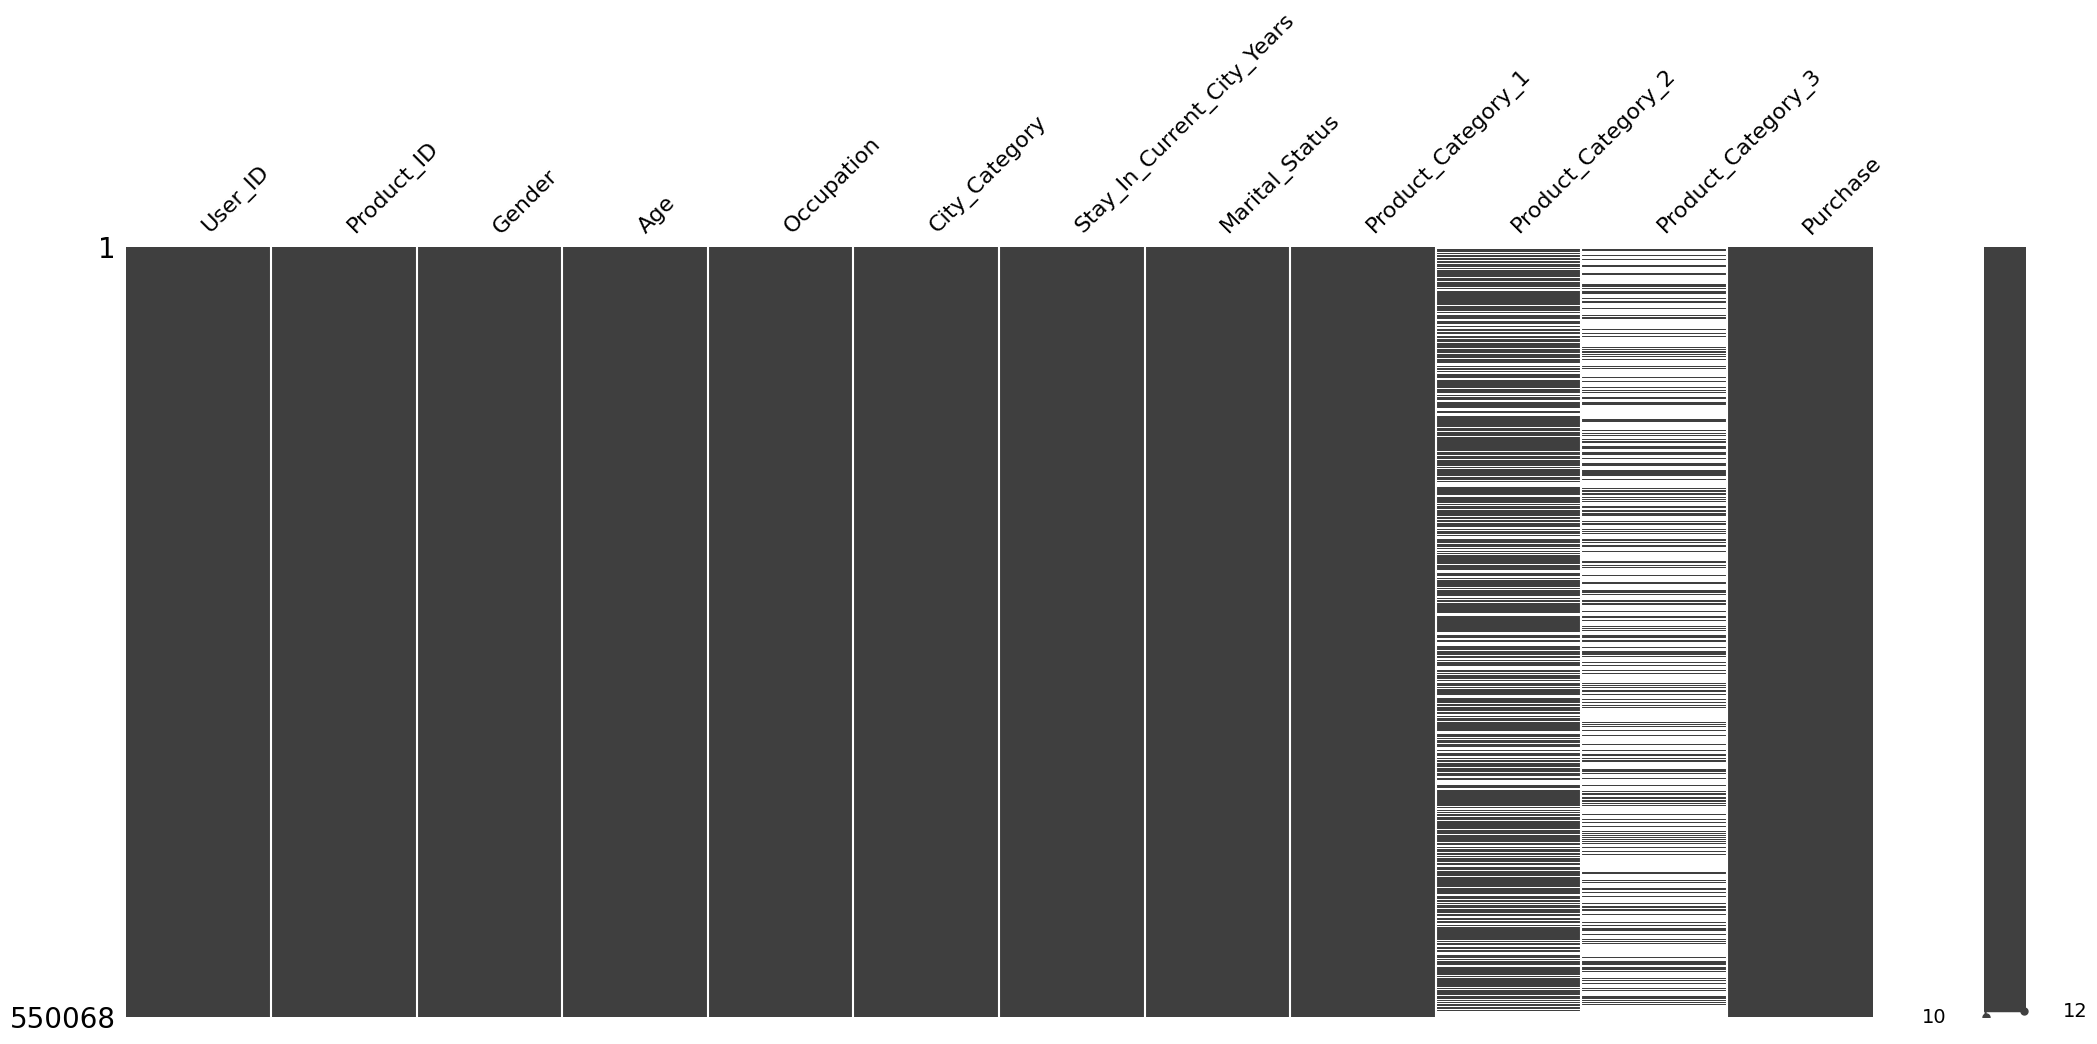

In [10]:
msno.matrix(Black_df)
plt.show()

I decided to use missingno liberary to visualize the number of misssing values in each column to better understand the relationship of missing data between different column.

First 9 columns which contained the most important information, don't seem to have any missing data as of now.

The column ‘Product_Category_2’ contains 31.57% null values which can be imputed.

There could be several reasons for a high percentage of missing data in the "Product_Category 3" feature (69.67%), certain transactions or products might not fall into predefined product category 3  , dropping this feature should not affect our analysis and prediction


## Exploratory Data Analysis
### Univariate Analysis 

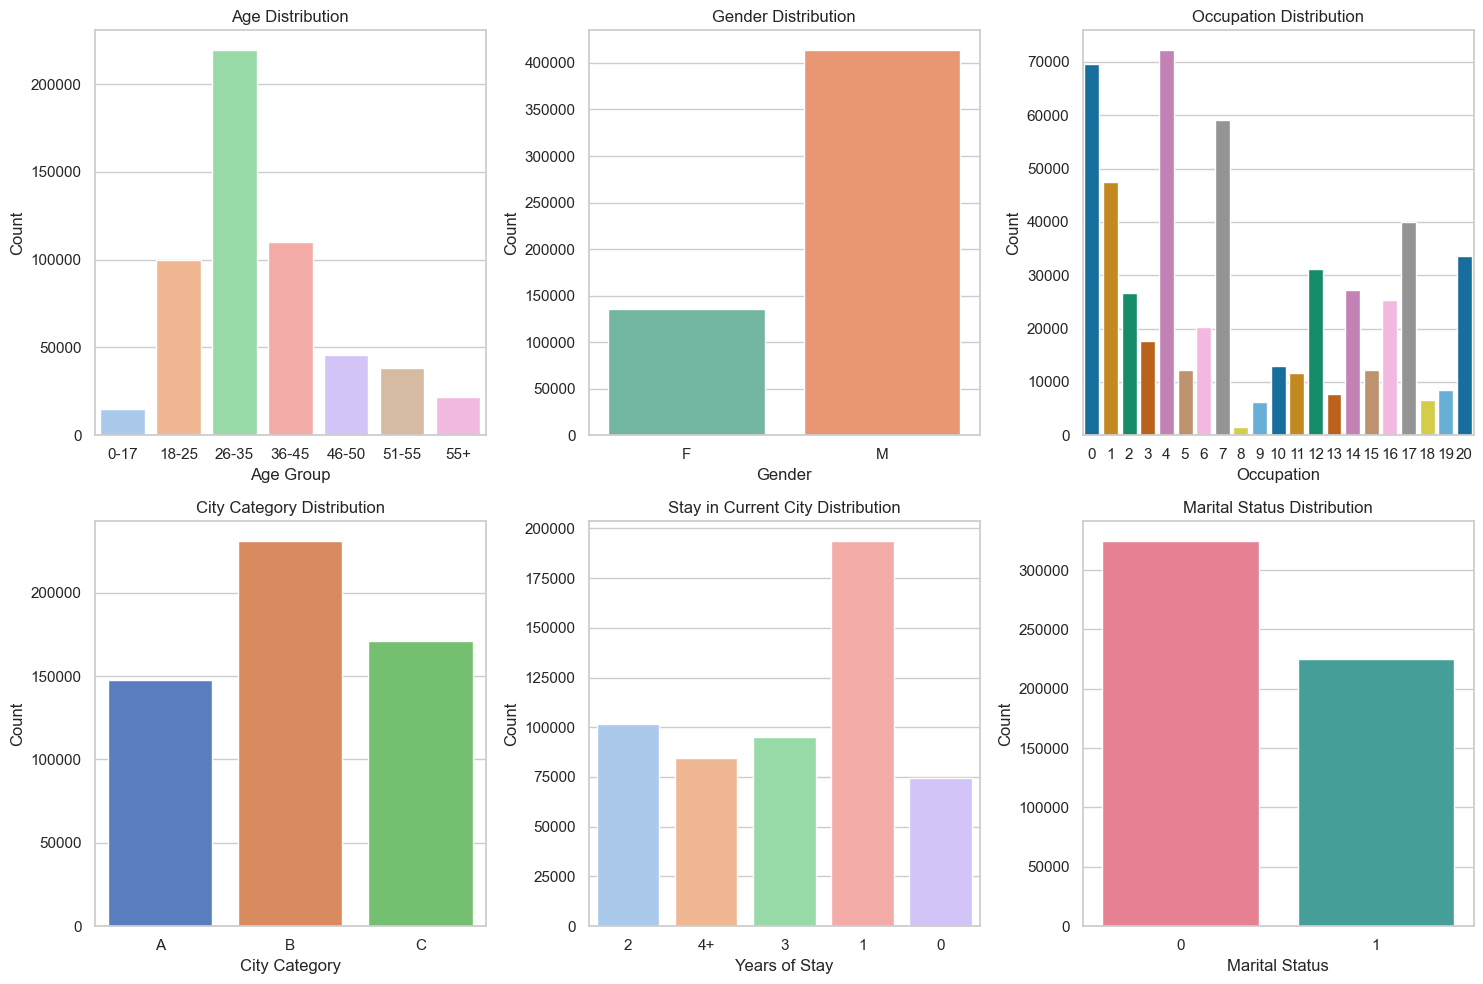

In [11]:
sns.set(style="whitegrid")  # Set the style of the plot

# Set the figure size
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Customize and create countplots
sns.countplot(x='Age', data=Black_df, palette='pastel', ax=axes[0, 0],
              order=["0-17", "18-25", "26-35", "36-45", "46-50", "51-55", "55+"])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Count')

sns.countplot(x='Gender', data=Black_df, palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Gender Distribution')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')

sns.countplot(x='Occupation', data=Black_df, palette='colorblind', ax=axes[0, 2])
axes[0, 2].set_title('Occupation Distribution')
axes[0, 2].set_xlabel('Occupation')
axes[0, 2].set_ylabel('Count')

sns.countplot(x='City_Category', data=Black_df, palette='muted', ax=axes[1, 0], order=["A", "B", "C"])
axes[1, 0].set_title('City Category Distribution')
axes[1, 0].set_xlabel('City Category')
axes[1, 0].set_ylabel('Count')

sns.countplot(x='Stay_In_Current_City_Years', data=Black_df, palette='pastel', ax=axes[1, 1])
axes[1, 1].set_title('Stay in Current City Distribution')
axes[1, 1].set_xlabel('Years of Stay')
axes[1, 1].set_ylabel('Count')

sns.countplot(x='Marital_Status', data=Black_df, palette='husl', ax=axes[1, 2])
axes[1, 2].set_title('Marital Status Distribution')
axes[1, 2].set_xlabel('Marital Status')
axes[1, 2].set_ylabel('Count')

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()


The analysis of the Black Friday shopping dataset reveals several key insights into consumer behavior:

Notably, the number of female shoppers was observed to be lower than their male counterparts, indicating a potential gender imbalance in Black Friday participation. Within the age distribution, the most prevalent group of shoppers fell within the 26-35 age bracket, suggesting that this demographic segment is particularly active during the Black Friday sales.

Moreover, when considering the city categories, it was found that City Category B attracted the highest number of shoppers, underscoring its significance in the Black Friday retail landscape.

In terms of the duration of stay in the current city, individuals with a stay duration of 1 year were the most engaged Black Friday shoppers. 

Furthermore, an analysis of marital status revealed that individuals classified as 'single' (Marital Status 0) constituted the majority of Black Friday participants. These findings provide valuable insights for retailers aiming to tailor their marketing strategies and product offerings to better resonate with the predominant demographics and preferences observed during the Black Friday shopping event.

 ##### Here's how we might exploit these results:

**Targeted Gender-Based Campaigns:**
   - Tailor marketing campaigns to address the preferences of both male and female shoppers.
   - Create gender-specific promotions, bundles, or advertisements to appeal to diverse needs.

**Customized Age-Group Offers:**
   - Focus on the 26-35 age group, the largest segment of Black Friday shoppers.
   - Design promotions and deals that resonate with the interests and priorities of this age range.

**City-Centric Marketing:**
   - Concentrate marketing efforts on City Category B, the city category with the highest shopper engagement.
   - Craft location-specific promotions or incentives for this category.

**Appealing to New Residents:**
   - Target individuals with a stay duration of 1 year with tailored marketing strategies.
   - Offer introductory deals, welcome packages, or exclusive discounts for newcomers.

**Singles-Focused Promotions:**
   - Create marketing campaigns that resonate with the preferences and lifestyles of singles.
   - Develop promotions aligned with the unique needs and interests of individuals with marital status 0 (single).

**Omnichannel Engagement:**
   - Implement an omnichannel marketing approach to engage shoppers across various platforms.
   - Utilize social media, email marketing, in-store promotions, and other channels to reach a broader audience.

**Personalized Recommendations:**
   - Leverage data analytics to provide personalized product recommendations.
   - Implement recommendation engines suggesting products aligned with age group, gender, and other characteristics.

**Customer Retention Strategies:**
   - Implement post-Black Friday customer retention strategies, such as loyalty programs.
   - Offer exclusive post-sale offers to encourage repeat business from the identified demographic segments.


### Purchase Analysis:

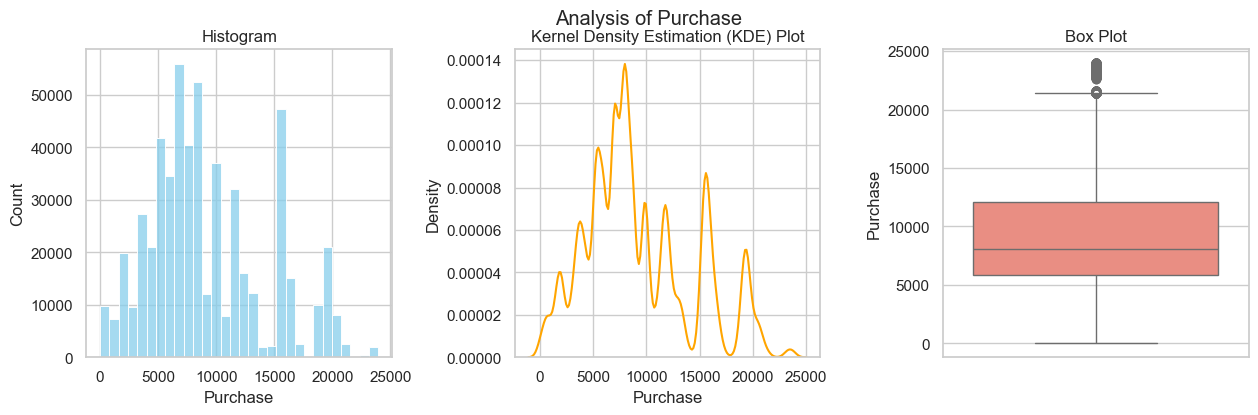

Skewness:  0.6001400037087128
Kurtosis:  -0.3383775655851702


In [12]:
# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Analysis of Purchase')
plt.subplots_adjust(wspace=0.4, hspace=0.4)
sns.set_style('darkgrid')

# Plot Histogram
sns.histplot(Black_df['Purchase'], kde=False, ax=axes[0], color='skyblue', bins=30)
axes[0].set_title('Histogram')

# Plot KDE Plot
sns.kdeplot(data=Black_df['Purchase'], ax=axes[1], color='orange')
axes[1].set_title('Kernel Density Estimation (KDE) Plot')

# Plot Boxplot
sns.boxplot(y=Black_df['Purchase'], ax=axes[2], color='salmon')
axes[2].set_title('Box Plot')

# Display the plots
plt.show()

# Display additional statistics
print('Skewness: ', Black_df['Purchase'].skew())
print('Kurtosis: ', Black_df['Purchase'].kurt())


A positive skewness value indicates that the distribution's tail extends towards the right.

The presence of numerous outliers, as illustrated in the boxplot, suggests the necessity to address and potentially remove these extreme values for a more robust analysis.

### Bivariate Analysis:

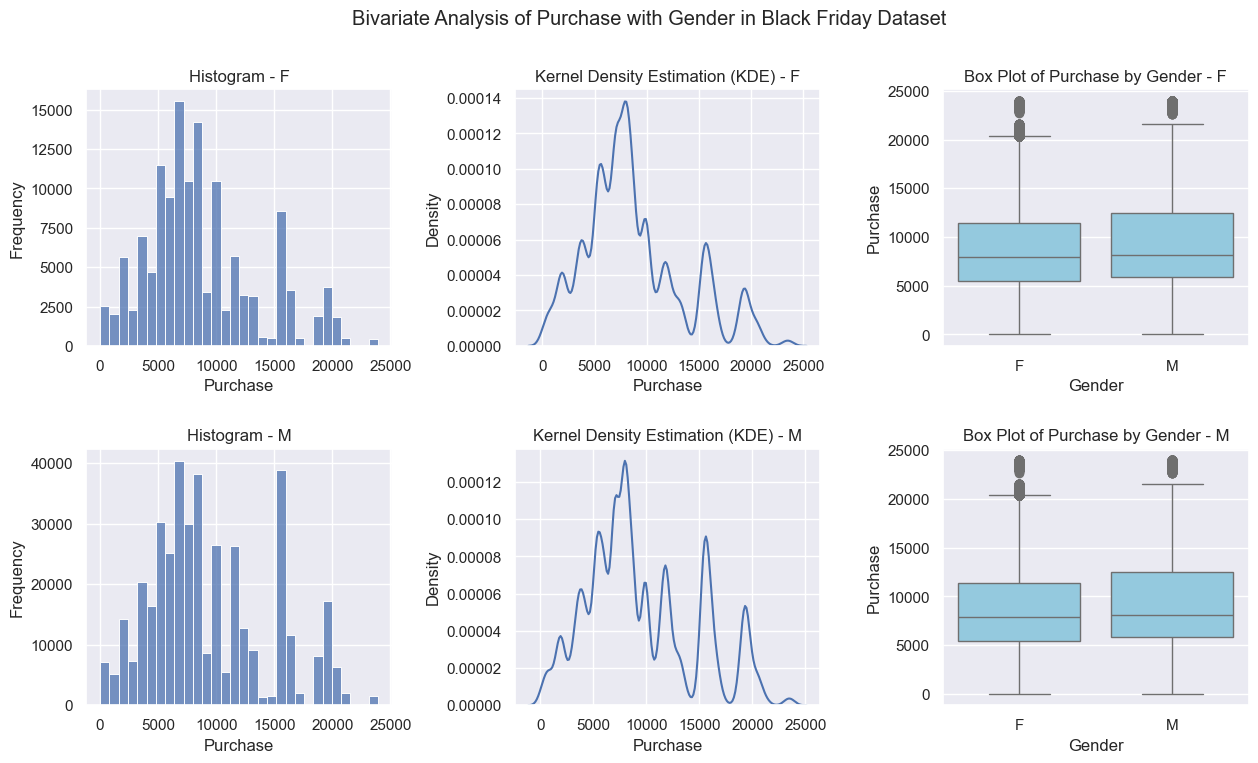

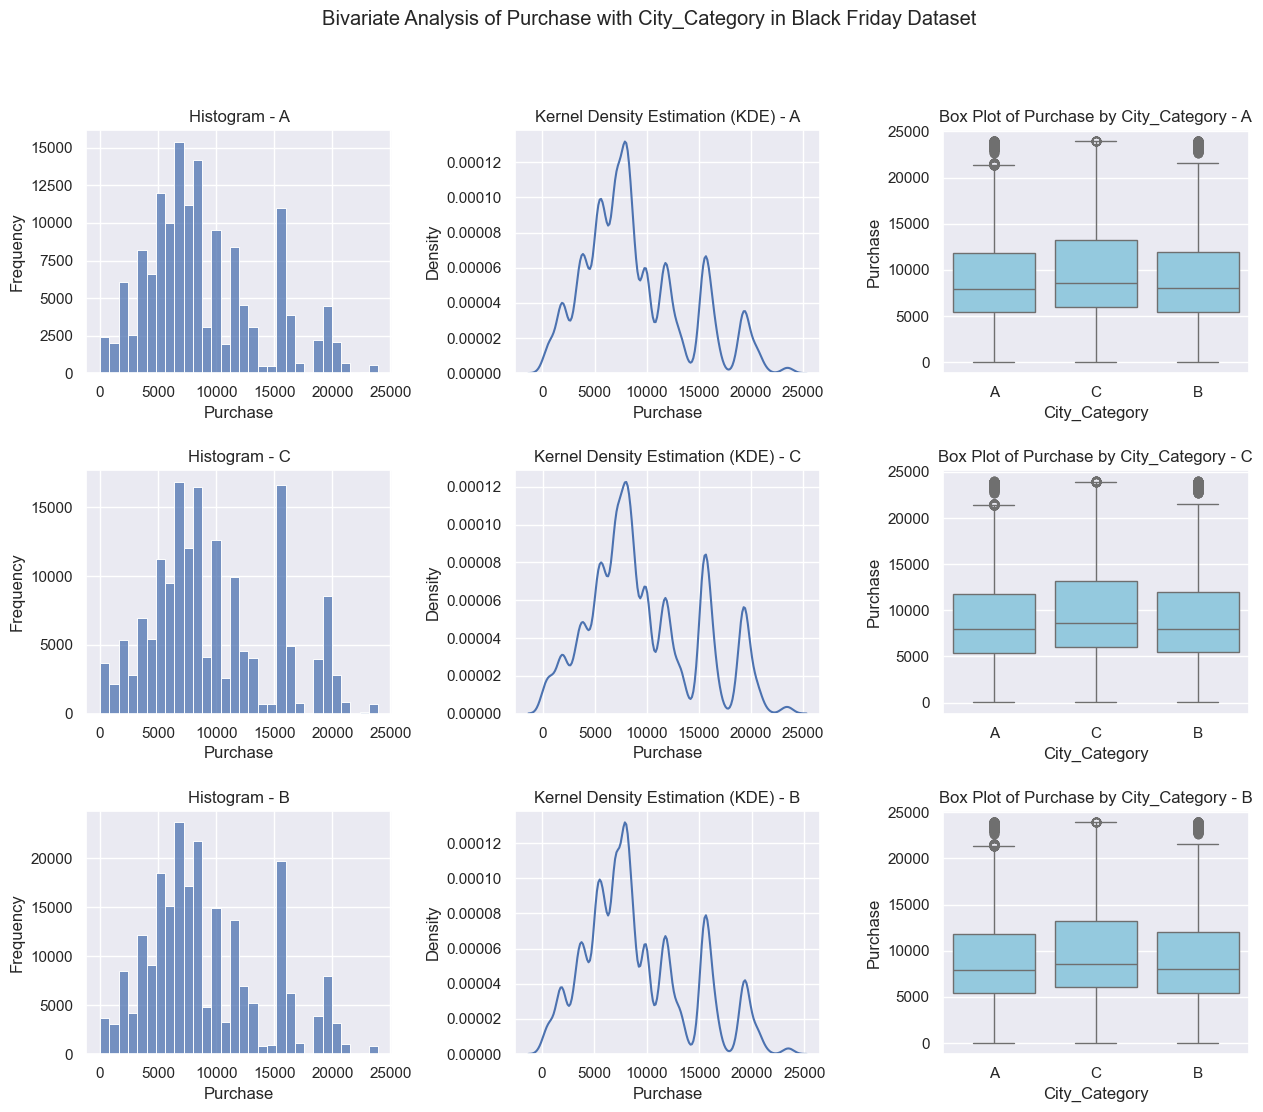

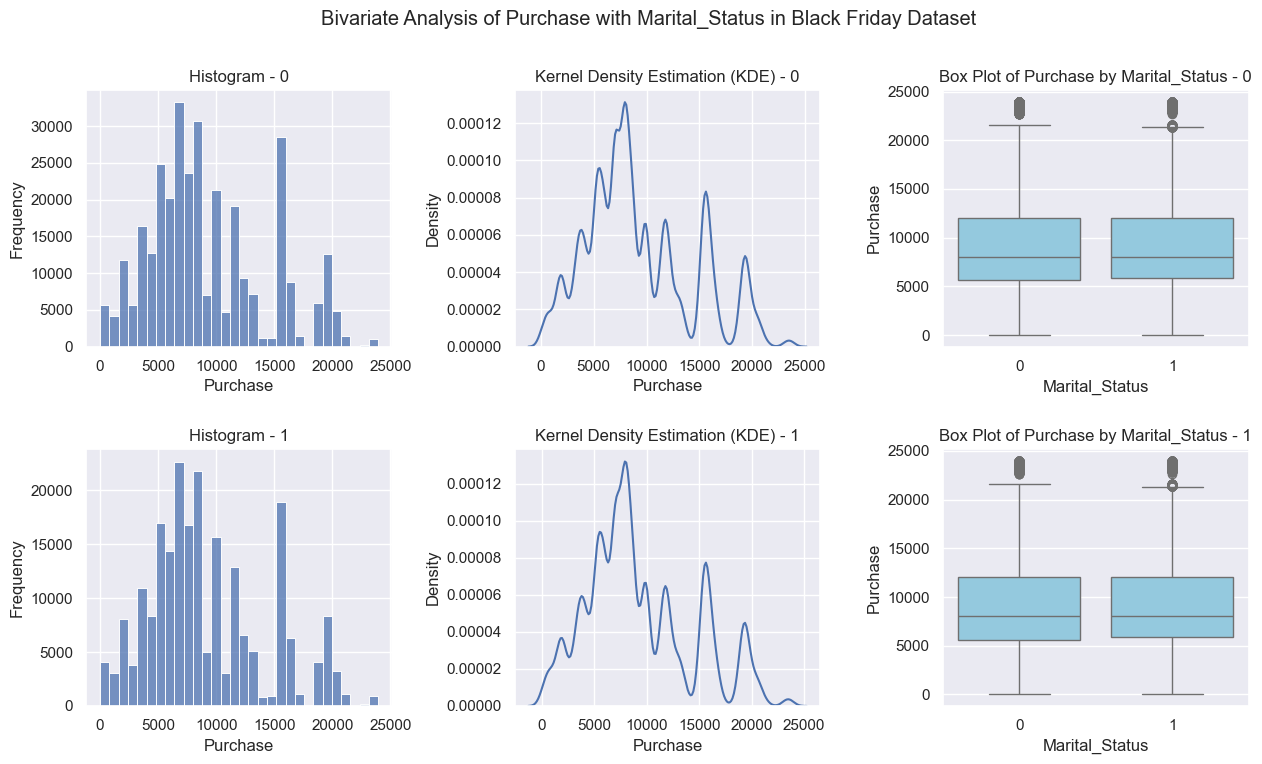

In [13]:
def plot_bivariate_analysis(feature):
    unique_values = Black_df[feature].unique()
    num_values = len(unique_values)

    # Set up subplots
    fig, axes = plt.subplots(num_values, 3, figsize=(15, 4 * num_values))
    fig.suptitle(f'Bivariate Analysis of Purchase with {feature} in Black Friday Dataset')
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    sns.set_style('darkgrid')

    for idx, value in enumerate(unique_values):
        # Histogram
        sns.histplot(Black_df.loc[Black_df[feature] == value]['Purchase'], kde=False, ax=axes[idx, 0], label=value, bins=30)
        axes[idx, 0].set_title(f'Histogram - {value}')
        axes[idx, 0].set_xlabel('Purchase')
        axes[idx, 0].set_ylabel('Frequency')

        # KDE Plot
        sns.kdeplot(data=Black_df.loc[Black_df[feature] == value]['Purchase'], ax=axes[idx, 1], label=value)
        axes[idx, 1].set_title(f'Kernel Density Estimation (KDE) - {value}')
        axes[idx, 1].set_xlabel('Purchase')
        axes[idx, 1].set_ylabel('Density')

        # Box Plot
        sns.boxplot(x=Black_df[feature], y=Black_df['Purchase'], ax=axes[idx, 2], color='skyblue')
        axes[idx, 2].set_title(f'Box Plot of Purchase by {feature} - {value}')
        axes[idx, 2].set_xlabel(f'{feature}')
        axes[idx, 2].set_ylabel('Purchase')

    plt.show()

# Example Usage:
plot_bivariate_analysis('Gender')
plot_bivariate_analysis('City_Category')
plot_bivariate_analysis('Marital_Status')


**Remark:** There is no variation in median of purchase for "Marital_Status"! , a less important feature for the variable purchase even the difference we saw it in the univariate analysis of the "Marital_Status"  , a chance to drop this feature later !

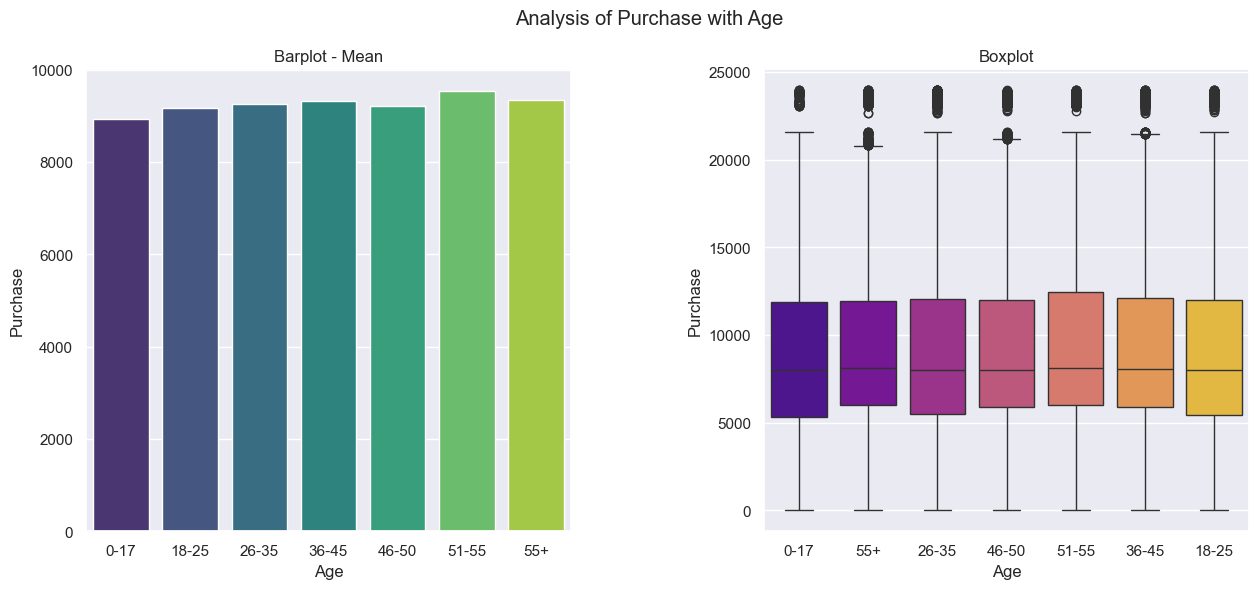

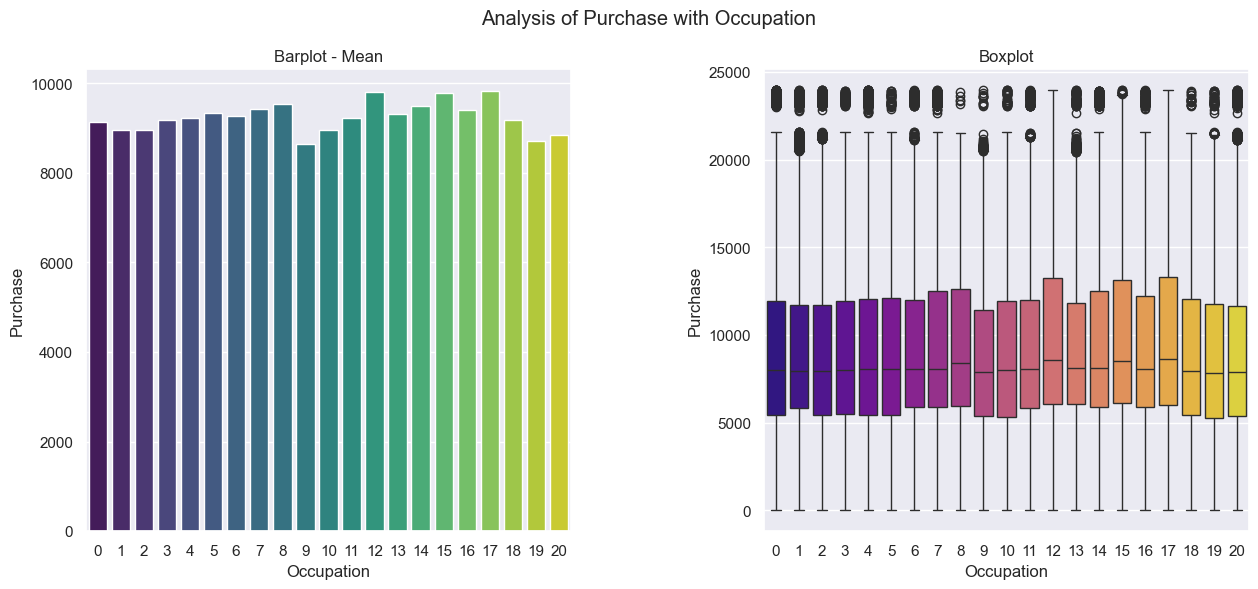

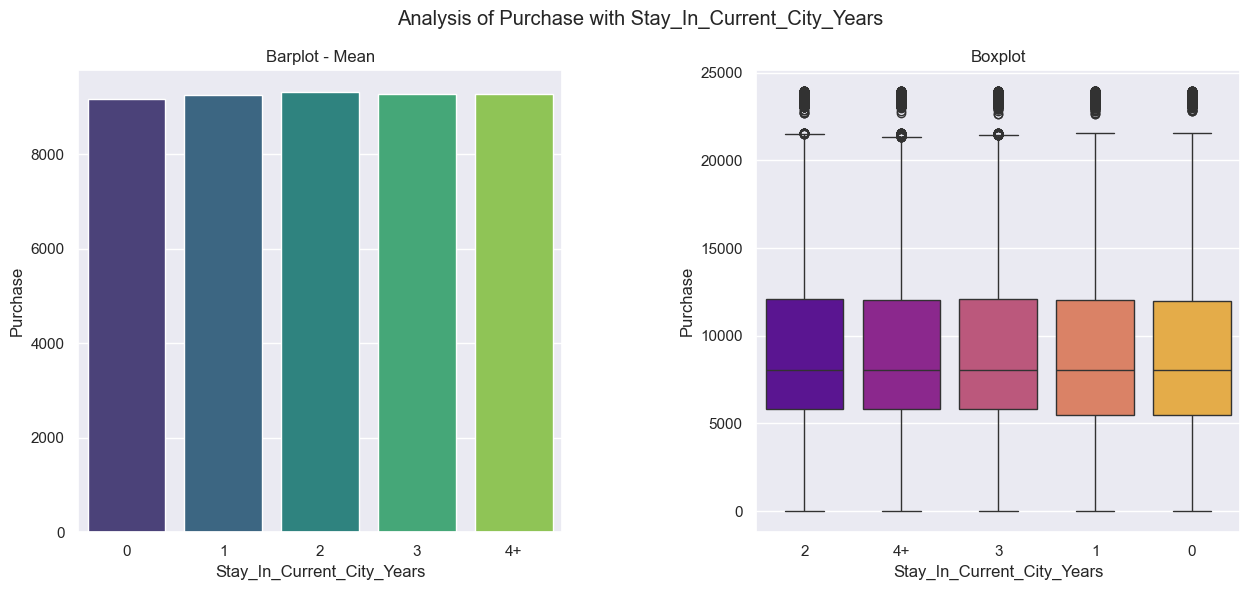

In [15]:
def plot_purchase_analysis_2(feature):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f'Analysis of Purchase with {feature}')
    plt.subplots_adjust(wspace=0.4)

    sns.set_style('darkgrid')

    # Barplot - Mean
    sns.barplot(x=feature, y='Purchase', data=Black_df.groupby([feature])["Purchase"].mean().reset_index().sort_values(feature),
                palette='viridis', ax=axes[0])
    axes[0].set_title('Barplot - Mean')

    # Boxplot
    sns.boxplot(y=Black_df['Purchase'], x=Black_df[feature], ax=axes[1], palette='plasma')
    axes[1].set_title('Boxplot')

    plt.show()

# Example Usage:
plot_purchase_analysis_2('Age')
plot_purchase_analysis_2('Occupation')
plot_purchase_analysis_2('Stay_In_Current_City_Years')


**Remark:** There is no variation in mean or median of purchase for "Stay_In_Current_City_Years"! , not the case with the other features

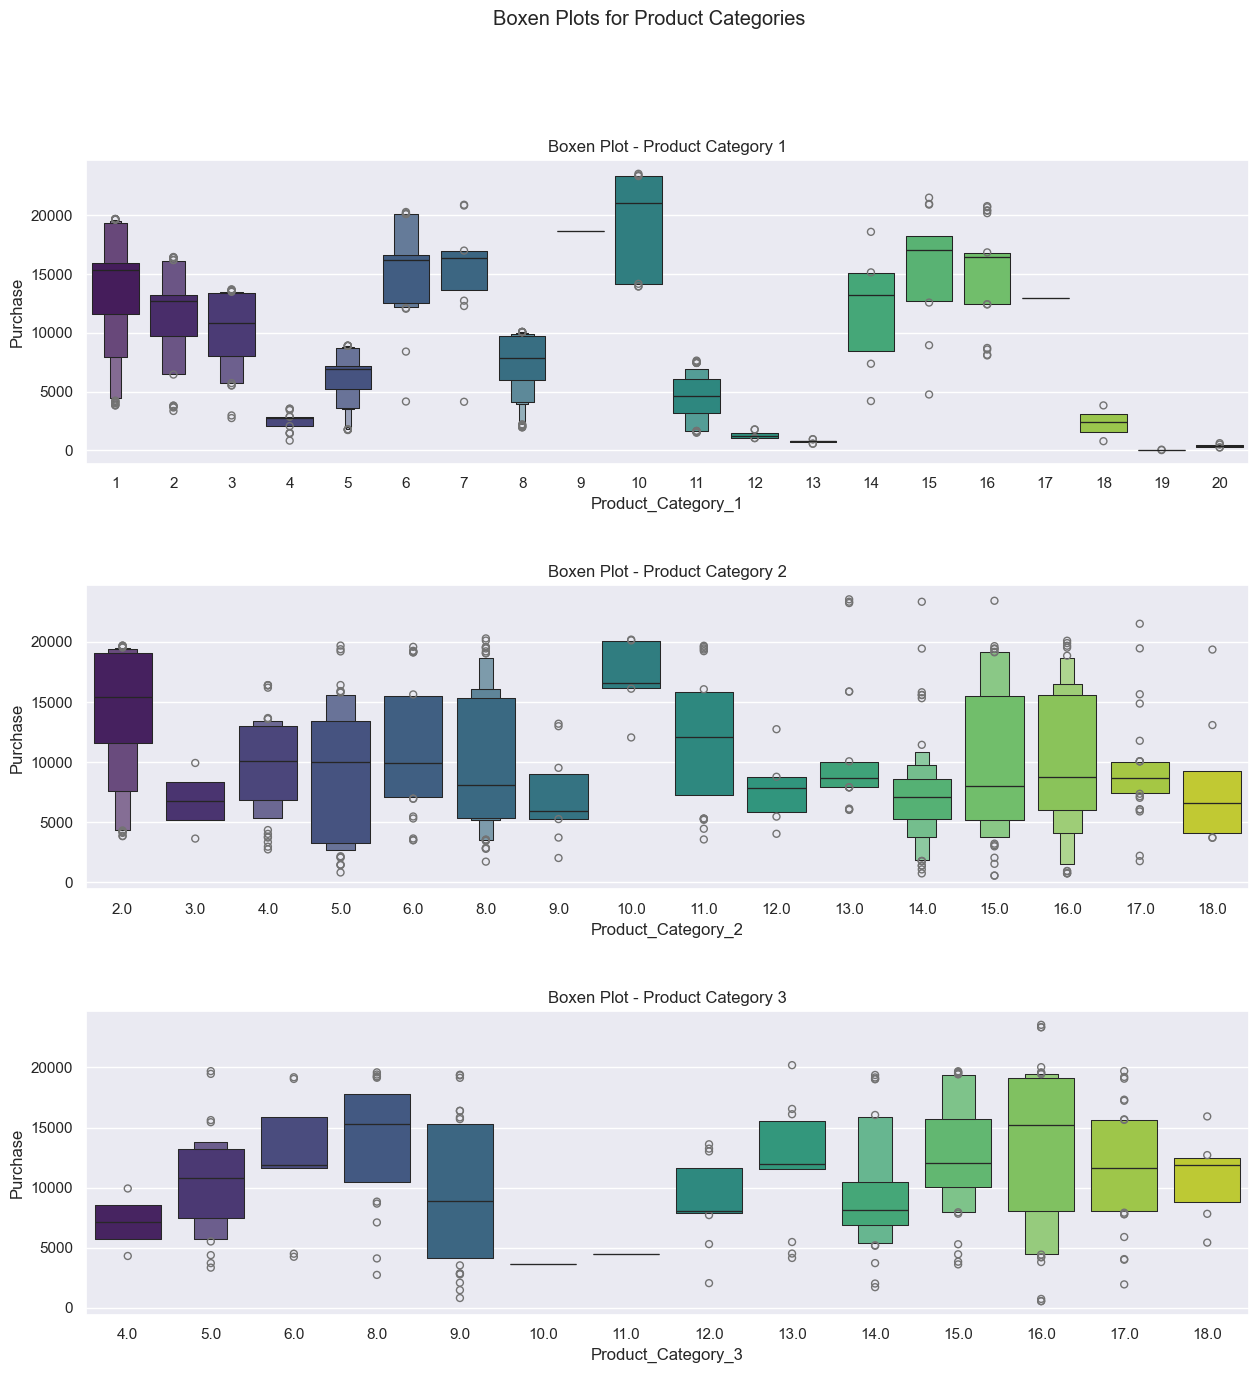

In [16]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
fig.suptitle('Boxen Plots for Product Categories')
plt.subplots_adjust(wspace=0.4, hspace=0.4)

sns.set_style('darkgrid')

# Sample a subset for better visualization
sub_df = Black_df.sample(1000)

# Boxen Plot for Product Category 1
sns.boxenplot(data=sub_df, x='Product_Category_1', y='Purchase', ax=axes[0], palette='viridis')
axes[0].set_title('Boxen Plot - Product Category 1')

# Boxen Plot for Product Category 2
sns.boxenplot(data=sub_df, x='Product_Category_2', y='Purchase', ax=axes[1], palette='viridis')
axes[1].set_title('Boxen Plot - Product Category 2')

# Boxen Plot for Product Category 3
sns.boxenplot(data=sub_df, x='Product_Category_3', y='Purchase', ax=axes[2], palette='viridis')
axes[2].set_title('Boxen Plot - Product Category 3')

plt.show()


**Remark:** The purchase values appear to be distinctly separated for each unique Product_Category, indicating a discrete nature in the distribution of purchases across different product categories.

### Multivariate Analysis:

In [18]:
df = Black_df[['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase']]

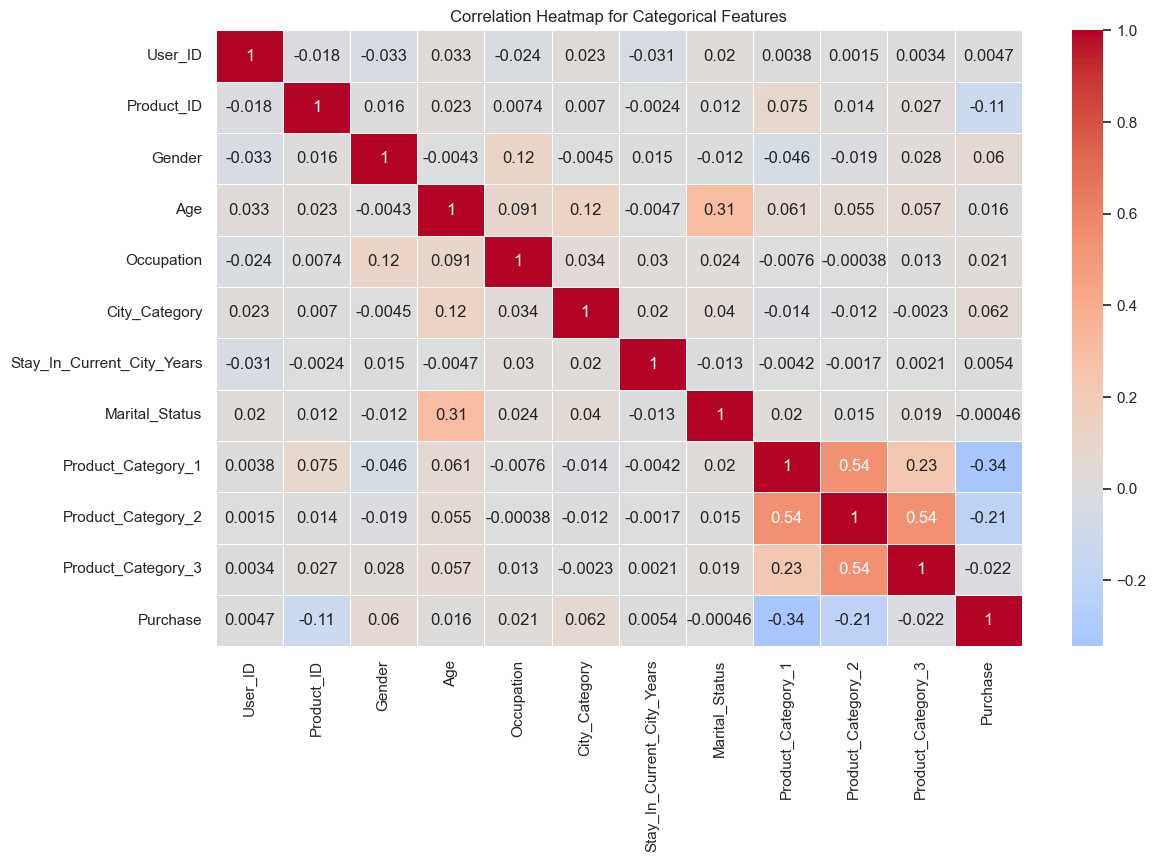

In [19]:
# Convert categorical columns to numerical codes
df = Black_df.copy()

columns_to_convert = ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
for col in columns_to_convert:
    df[col] = df[col].astype('category').cat.codes

# Calculate correlation matrix
correlation_matrix = df.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(13, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, center=0)
plt.title('Correlation Heatmap for Categorical Features')
plt.show()


Marital_Status and Age are highly correlated

Marital_Status, and Stay_In_Current_City_Years are highly uncorrelated with Purchase,maybe we could remove these features, we have to mention again that there were no variation in median or mean for 'Stay_In_Current_City_Years'

## The End